In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
import deepchem as dc
from deepchem.molnet.load_function.hiv_datasets import load_hiv
from tqdm import tqdm

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/steshin/miniconda3/envs/lohi_benchmark/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
import sys
sys.path.append('../../code')

from splits import get_nearest_mols

# MoleculeNet HIV

In [22]:
hiv = load_hiv()

In [23]:
train = hiv[1][0]
#valid = hiv[1][1]
test = hiv[1][2]

In [24]:
train_smiles = list(train.ids)
test_smiles = list(test.ids)

In [25]:
nearest_dist, nearest_idx = get_nearest_mols(test_smiles, train_smiles, return_idx=True)

[13:46:11] WARNING: not removing hydrogen atom without neighbors
[13:46:11] WARNING: not removing hydrogen atom without neighbors


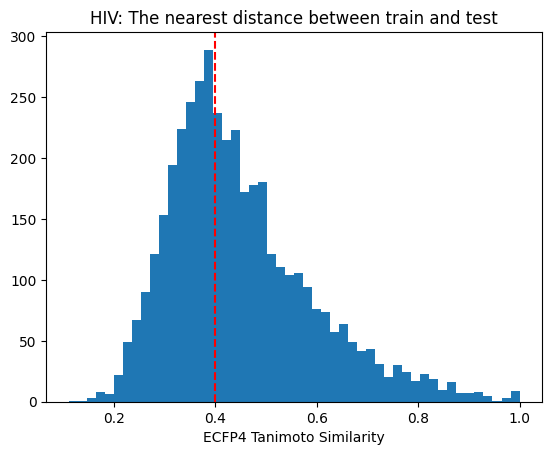

In [26]:
plt.hist(nearest_dist, bins=50)
plt.axvline(x=0.4, color = 'r', ls='--')
plt.title('HIV: The nearest distance between train and test')
plt.xlabel('ECFP4 Tanimoto Similarity')
plt.savefig('benchmarks_distance_distribution/hiv.png')

In [9]:
(np.array(nearest_dist) > 0.4).mean()

0.5601750547045952

In [10]:
similar_idx = []
for i, sim in enumerate(nearest_dist):
    if sim > 0.99:
        similar_idx.append(i)
similar_idx

[352, 818, 1279, 1308, 1451, 1711, 2406, 2879, 3441]

In [11]:
# Looking for the most similar molecules
test_idx = similar_idx[0]
train_idx = nearest_idx[test_idx]

In [12]:
train_similar = train_smiles[train_idx]
test_similar = test_smiles[test_idx]

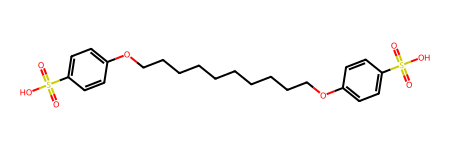

In [13]:
Chem.MolFromSmiles(train_similar)

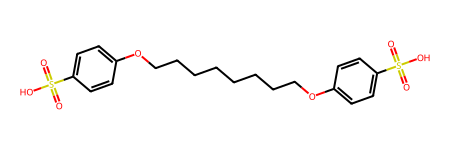

In [14]:
Chem.MolFromSmiles(test_similar)

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw

def draw_molecules(train_smiles, test_smiles):
    # Convert SMILES to RDKit molecule objects
    train_mol = Chem.MolFromSmiles(train_smiles)
    test_mol = Chem.MolFromSmiles(test_smiles)

    # Check if the molecules were created successfully
    if train_mol is None or test_mol is None:
        print("One or both of the provided SMILES strings are invalid.")
        return

    # Create a list of the molecule objects
    mols = [train_mol, test_mol]
    labels = ['train', 'test']

    # Draw the molecules in a 1x2 grid
    img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(500, 500), legends=labels)

    # Display the image
    return img


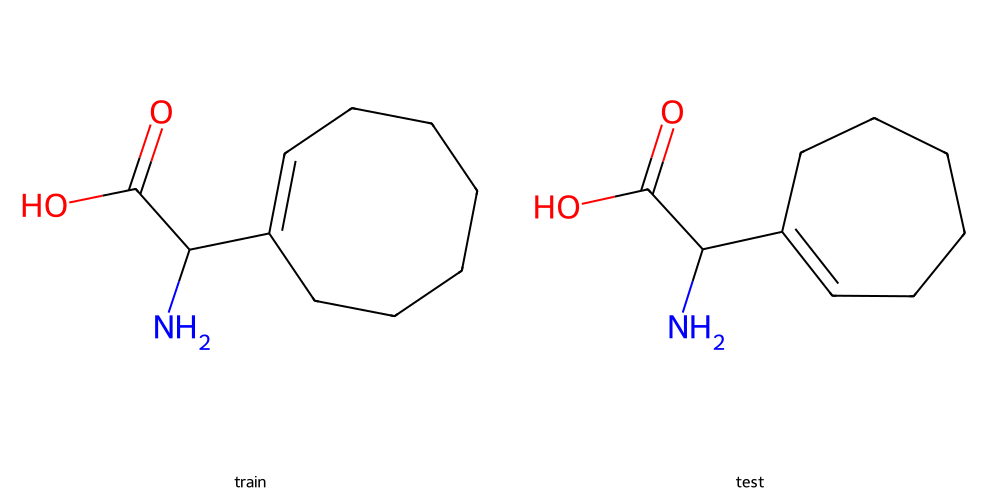

In [13]:
draw_molecules(train_similar, test_similar)

# MoleculeNet ESOL

In [15]:
from deepchem.molnet.load_function.delaney_datasets import load_delaney

In [27]:
esol = load_delaney(splitter='random')
esol

(['measured log solubility in mols per litre'],
 (<DiskDataset X.shape: (902, 1024), y.shape: (902, 1), w.shape: (902, 1), ids: ['CC(C)OC(C)C' 'CCCC(=O)OC' 'O=C1CCCN1' ...
   'CCOP(=S)(OCC)Oc1ccc(cc1)S(C)=O ' 'CC12CCC(O)CC1CCC3C2CCC4(C)C3CCC4=O'
   'CC(C)=CCCC(C)=CC(=O)'], task_names: ['measured log solubility in mols per litre']>,
  <DiskDataset X.shape: (113, 1024), y.shape: (113, 1), w.shape: (113, 1), ids: ['CCOCCOCC' 'CCN2c1cc(Cl)ccc1NC(=O)c3cccnc23 ' 'CNc1ccccc1' ...
   'Cc1ccc(cc1)c2ccccc2' 'c1(C(=O)OCCCCCC(C)(C))c(C(=O)OCCCCCC(C)(C))cccc1'
   'N(c1ccccc1)c2ccccc2'], task_names: ['measured log solubility in mols per litre']>,
  <DiskDataset X.shape: (113, 1024), y.shape: (113, 1), w.shape: (113, 1), ids: ['CCOC(=O)NCCOc2ccc(Oc1ccccc1)cc2'
   'ClC1(C2(Cl)C3(Cl)C4(Cl)C5(Cl)C1(Cl)C3(Cl)Cl)C5(Cl)C(Cl)(Cl)C24Cl'
   'Oc1ccc(C=O)cc1' ... 'C1c2ccccc2c3ccc4ccccc4c13'
   'CC12CCC3C(CCC4=CC(=O)CCC34C)C2CCC1O' 'CCCCCCCl'], task_names: ['measured log solubility in mols per litre']>),
 [<deep

In [28]:
train = esol[1][0]
#valid = hiv[1][1]
test = esol[1][2]

In [29]:
train_smiles = list(train.ids)
test_smiles = list(test.ids)

In [30]:
nearest_dist, nearest_idx = get_nearest_mols(test_smiles, train_smiles, return_idx=True)

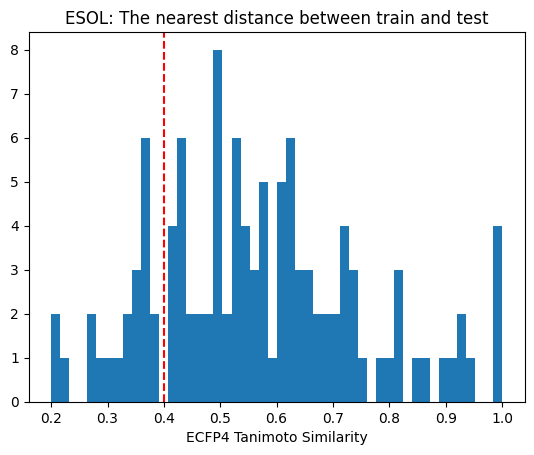

In [31]:
plt.hist(nearest_dist, bins=50)
plt.axvline(x=0.4, color = 'r', ls='--')
plt.title('ESOL: The nearest distance between train and test')
plt.xlabel('ECFP4 Tanimoto Similarity')
plt.savefig('benchmarks_distance_distribution/esol.png')

In [15]:
(np.array(nearest_dist) > 0.4).mean()

0.7610619469026548

In [32]:
similar_idx = []
for i, sim in enumerate(nearest_dist):
    if sim > 0.99:
        similar_idx.append(i)
similar_idx

[43, 77, 92, 101, 103, 109]

In [42]:
# Looking for the most similar molecules
test_idx = similar_idx[4]
train_idx = nearest_idx[test_idx]

train_similar = train_smiles[train_idx]
test_similar = test_smiles[test_idx]

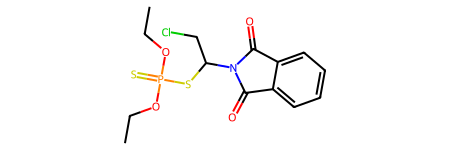

In [43]:
Chem.MolFromSmiles(train_similar)

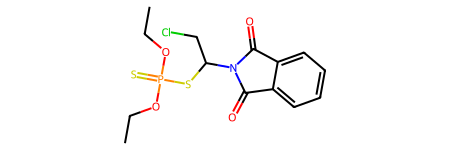

In [44]:
Chem.MolFromSmiles(test_similar)

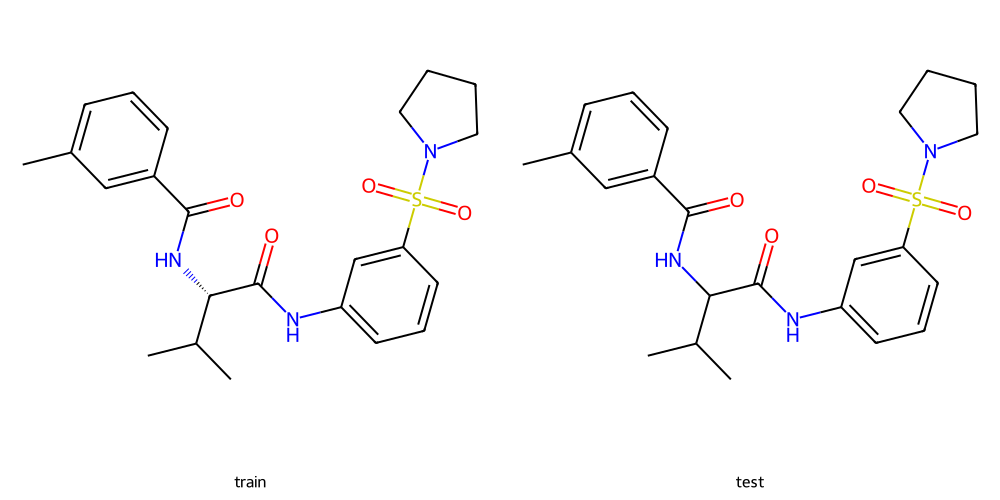

In [21]:
# Looking for the most similar molecules
train_idx = similar_idx[1]
test_idx = nearest_idx[train_idx]

train_similar = train_smiles[train_idx]
test_similar = test_smiles[test_idx]

from rdkit import Chem
from rdkit.Chem import Draw

def draw_molecules(train_smiles, test_smiles):
    # Convert SMILES to RDKit molecule objects
    train_mol = Chem.MolFromSmiles(train_smiles)
    test_mol = Chem.MolFromSmiles(test_smiles)

    # Check if the molecules were created successfully
    if train_mol is None or test_mol is None:
        print("One or both of the provided SMILES strings are invalid.")
        return

    # Create a list of the molecule objects
    mols = [train_mol, test_mol]
    labels = ['train', 'test']

    # Draw the molecules in a 1x2 grid
    img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(500, 500), legends=labels)

    # Display the image
    return img

draw_molecules(train_similar, test_similar)

# MoleculeNet PDBBind

In [22]:
from deepchem.molnet.load_function.pdbbind_datasets import load_pdbbind

In [ ]:
pdbbind = load_pdbbind()